Analyzing Neighborhoods in Mumbai, India for Starting a Restaurant


# Importing Libraries

In [178]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import requests
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium # map rendering library

#Installing Geopy

In [179]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [180]:
!pip install geocoder

In [181]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

In [182]:
import geocoder

importing Data from Wikpedia to Dataframe

In [183]:
url='https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Mumbai'


In [184]:
df=pd.read_html(url)[0]
df.rename(columns={'Area': 'Neighborhood'}, inplace=True)
df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1])
df.head()

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270


In [185]:
# Fig 1 Top 5 rows of Mumbai neighbourhoods data scraped from Wikipedia.

In [186]:
df.shape

(93, 4)

In [187]:

df['Latitude1'] = None
df['Longitude1'] = None

for i, neigh in enumerate(df['Neighborhood']):
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Mumbai, India'.format(neigh))
        lat_lng_coords = g.latlng
    
    if lat_lng_coords:
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
    
    df.loc[i, 'Latitude1'] = latitude
    df.loc[i, 'Longitude1'] = longitude

df.head()

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1
0,Amboli,Western Suburbs,19.129300,72.843400,19.1291,72.8464
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,19.1084,72.8623
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,19.1251,72.8325
3,Four Bungalows,Western Suburbs,19.124714,72.827210,19.1264,72.8242
4,Lokhandwala,Western Suburbs,19.130815,72.829270,19.1432,72.8249


In [188]:
df[['Latitude1','Longitude1']]=df[['Latitude1','Longitude1']].astype(float)

In [189]:
df['Latdiff']=abs(df['Latitude1']-df['Latitude'])
df['Longdiff']=abs(df['Longitude1']-df['Longitude'])

In [190]:
df.head()

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.129300,72.843400,19.12906,72.84644,0.000240,0.003040
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,19.10836,72.86233,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,19.12505,72.83248,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.124714,72.827210,19.12638,72.82420,0.001666,0.003010
4,Lokhandwala,Western Suburbs,19.130815,72.829270,19.14316,72.82487,0.012345,0.004400


In [192]:
#Fig3: Absolute difference between latitude and longitude values obtained from Wikipedia and Geocoder.

In [193]:
# Select latitide1/longitude1 if latdiff or longdiff is more than 0.001 
df.loc[df.Latdiff>0.001, 'Latitude'] = df.loc[df.Latdiff>0.001, 'Latitude1']
df.loc[df.Longdiff>0.001, 'Longitude'] = df.loc[df.Longdiff>0.001, 'Longitude1']
df.shape

(93, 8)

In [194]:
df.where(df['Longitude']==df['Longitude1']).shape #same shape value ensures that Longitude1 value transferred.

(93, 8)

In [195]:
df=df.drop(['Latitude1','Longitude1','Latdiff','Longdiff'],axis=1,errors='ignore')

In [196]:
df['Neighborhood'].isnull().sum()# ensures no Nan Value

0

In [197]:
df.head()

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.84644
1,"Chakala, Andheri",Western Suburbs,19.108360,72.86233
2,D.N. Nagar,Western Suburbs,19.124085,72.83248
3,Four Bungalows,Western Suburbs,19.126380,72.82420
4,Lokhandwala,Western Suburbs,19.143160,72.82487


In [199]:
#fig4: Final Dataframe 

In [200]:
import matplotlib as plt

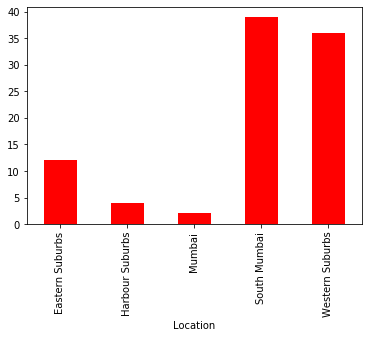

In [201]:

df.groupby('Location')['Neighborhood'].count().plot.bar(color='red')

  


In [203]:
#Fig6; Number of neighbourhoods grouped by location.

# Plotting this on Folium

In [204]:
address = 'Mumbai'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai are 18.9387711, 72.8353355.


In [206]:
#Fig2: Obtaining geographical coordinates of Mumbai

In [207]:
# create map of New York using latitude and longitude values
map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng,location,neighborhood in zip(df['Latitude'], df['Longitude'], df['Location'], df['Neighborhood']):
    label = '{}, {}'.format(location, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)  
    
map_mumbai

In [208]:
# Fig7 Folium Map depicting neighbourhood

In [ ]:
# Using Four Square API

In [209]:
# Four Square stadium
CLIENT_ID = 'R02LCWRPPOEDKK5UZRZA1PWXUN0XO5HDDBHXTAQ0BURNF4AR' # your Foursquare ID
CLIENT_SECRET = 'JDJ2N5JIQSRVVLL4BPBWY4DY2NXSU0MBHSRRDV5PAMOV1K1B' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 200
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R02LCWRPPOEDKK5UZRZA1PWXUN0XO5HDDBHXTAQ0BURNF4AR
CLIENT_SECRET:JDJ2N5JIQSRVVLL4BPBWY4DY2NXSU0MBHSRRDV5PAMOV1K1B


In [210]:
latitude=df.loc[0,'Latitude']
longitude=df.loc[0,'Longitude']
radius=1000


In [211]:
url ='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=R02LCWRPPOEDKK5UZRZA1PWXUN0XO5HDDBHXTAQ0BURNF4AR&client_secret=JDJ2N5JIQSRVVLL4BPBWY4DY2NXSU0MBHSRRDV5PAMOV1K1B&v=20180604&ll=19.1293,72.84644000000003&radius=1000&limit=200'

In [212]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f97b12e182d05230b049789'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Jogeshwari West',
  'headerFullLocation': 'Jogeshwari West, Mumbai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 24,
  'suggestedBounds': {'ne': {'lat': 19.13830000900001,
    'lng': 72.85594823590122},
   'sw': {'lat': 19.120299990999992, 'lng': 72.83693176409884}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d10d39b7177b1f7d2c75322',
       'name': 'Cafe Arfa',
       'location': {'address': 'S V Road',
        'crossStreet': 'Andheri West',
        'lat': 19.12893009094341,
        'lng': 72.84714004510111,
        'labeledLatLngs': [{'label'

In [213]:
# assign relevant part of JSON to venues
venues = results["response"]['groups'][0]['items']

# tranform venues into a dataframe
dataframe = pd.json_normalize(venues)
dataframe.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood
0,e-0-4d10d39b7177b1f7d2c75322-0,0,"[{'summary': 'This spot is popular', 'type': '...",4d10d39b7177b1f7d2c75322,Cafe Arfa,S V Road,Andheri West,19.128930,72.847140,"[{'label': 'display', 'lat': 19.12893009094341...",...,IN,Mumbai,Mahārāshtra,India,"[S V Road (Andheri West), Mumbai 400058, Mahār...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN
1,e-0-4e4eb3c68877402b06b92160-1,0,"[{'summary': 'This spot is popular', 'type': '...",4e4eb3c68877402b06b92160,"5 Spice , Bandra","Pali Naka, Bandra west",NaN,19.130421,72.847206,"[{'label': 'display', 'lat': 19.13042108034359...",...,IN,Mumbai,Mahārāshtra,India,"[Pali Naka, Bandra west, Mumbai, Mahārāshtra, ...","[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",0,[],NaN,NaN
2,e-0-5174e2be498e39cf0d1c20cb-2,0,"[{'summary': 'This spot is popular', 'type': '...",5174e2be498e39cf0d1c20cb,Shawarma Factory,Dadabhai Road,"Off JP Road, Near Navrang Cinema",19.124591,72.840398,"[{'label': 'display', 'lat': 19.12459057217346...",...,IN,Mumbai,Mahārāshtra,India,"[Dadabhai Road (Off JP Road, Near Navrang Cine...","[{'id': '4bf58dd8d48988d10b941735', 'name': 'F...",0,[],NaN,NaN
3,e-0-55fc3615498e141bd45da525-3,0,"[{'summary': 'This spot is popular', 'type': '...",55fc3615498e141bd45da525,Jaffer Bhai's Delhi Darbar,Jogeshwari West,NaN,19.137714,72.845909,"[{'label': 'display', 'lat': 19.13771405659304...",...,IN,Mumbai,Mahārāshtra,India,"[Jogeshwari West, Mumbai, Mahārāshtra, India]","[{'id': '54135bf5e4b08f3d2429dff4', 'name': 'M...",0,[],NaN,NaN
4,e-0-4fc97d4de4b0b44b52d33799-4,0,"[{'summary': 'This spot is popular', 'type': '...",4fc97d4de4b0b44b52d33799,Subway,"Shop No. 5, Mayfair Meridian, Amboli,",Ceasar Road,19.127860,72.844461,"[{'label': 'display', 'lat': 19.1278600430168,...",...,IN,Andheri West,Mahārāshtra,India,"[Shop No. 5, Mayfair Meridian, Amboli, (Ceasar...","[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",0,[],NaN,NaN


In [214]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns =  [col for col in dataframe.columns if col.startswith('venue')] # select all the columns
dataframe_filtered = dataframe.loc[:, filtered_columns]#selct from data frame all
# function that extracts the category of the venue



# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered['categories'].apply(lambda x:x[0]['name'])




dataframe_filtered.head()

,id,name,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,categories,count,groups,id,neighborhood
0,4d10d39b7177b1f7d2c75322,Cafe Arfa,S V Road,Andheri West,19.128930,72.847140,"[{'label': 'display', 'lat': 19.12893009094341...",84,400058,IN,Mumbai,Mahārāshtra,India,"[S V Road (Andheri West), Mumbai 400058, Mahār...",Indian Restaurant,0,[],NaN,NaN
1,4e4eb3c68877402b06b92160,"5 Spice , Bandra","Pali Naka, Bandra west",NaN,19.130421,72.847206,"[{'label': 'display', 'lat': 19.13042108034359...",148,NaN,IN,Mumbai,Mahārāshtra,India,"[Pali Naka, Bandra west, Mumbai, Mahārāshtra, ...",Chinese Restaurant,0,[],NaN,NaN
2,5174e2be498e39cf0d1c20cb,Shawarma Factory,Dadabhai Road,"Off JP Road, Near Navrang Cinema",19.124591,72.840398,"[{'label': 'display', 'lat': 19.12459057217346...",823,NaN,IN,Mumbai,Mahārāshtra,India,"[Dadabhai Road (Off JP Road, Near Navrang Cine...",Falafel Restaurant,0,[],NaN,NaN
3,55fc3615498e141bd45da525,Jaffer Bhai's Delhi Darbar,Jogeshwari West,NaN,19.137714,72.845909,"[{'label': 'display', 'lat': 19.13771405659304...",938,NaN,IN,Mumbai,Mahārāshtra,India,"[Jogeshwari West, Mumbai, Mahārāshtra, India]",Mughlai Restaurant,0,[],NaN,NaN
4,4fc97d4de4b0b44b52d33799,Subway,"Shop No. 5, Mayfair Meridian, Amboli,",Ceasar Road,19.127860,72.844461,"[{'label': 'display', 'lat': 19.1278600430168,...",262,400058,IN,Andheri West,Mahārāshtra,India,"[Shop No. 5, Mayfair Meridian, Amboli, (Ceasar...",Sandwich Place,0,[],NaN,NaN


In [215]:
df1=dataframe_filtered[['name','categories','lat','lng']]
df1.head()

,name,categories,lat,lng
0,Cafe Arfa,Indian Restaurant,19.128930,72.847140
1,"5 Spice , Bandra",Chinese Restaurant,19.130421,72.847206
2,Shawarma Factory,Falafel Restaurant,19.124591,72.840398
3,Jaffer Bhai's Delhi Darbar,Mughlai Restaurant,19.137714,72.845909
4,Subway,Sandwich Place,19.127860,72.844461


In [216]:
# Running FOURSQUARE api on Locations

In [217]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)



In [218]:
mumbai_venues=getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'],radius=1000
                                  )
mumbai_venues.shape

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisa
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank
D

(3592, 7)

In [219]:
mumbai_venues.shape

(3592, 7)

In [220]:
mumbai_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amboli,19.1293,72.84644,Cafe Arfa,19.128930,72.847140,Indian Restaurant
1,Amboli,19.1293,72.84644,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
2,Amboli,19.1293,72.84644,Shawarma Factory,19.124591,72.840398,Falafel Restaurant
3,Amboli,19.1293,72.84644,Jaffer Bhai's Delhi Darbar,19.137714,72.845909,Mughlai Restaurant
4,Amboli,19.1293,72.84644,Subway,19.127860,72.844461,Sandwich Place


In [222]:
#Fig5: Data from Foursquare API 

In [223]:
mumbai_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aarey Milk Colony,11,11,11,11,11,11
Agripada,29,29,29,29,29,29
Altamount Road,69,69,69,69,69,69
Amboli,24,24,24,24,24,24
Amrut Nagar,14,14,14,14,14,14
...,...,...,...,...,...,...
Vikhroli,8,8,8,8,8,8
Vile Parle,77,77,77,77,77,77
Virar,11,11,11,11,11,11


In [224]:
mumbai_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
ATM,1,1,1,1,1,1
Accessories Store,3,3,3,3,3,3
Airport,2,2,2,2,2,2
Airport Lounge,1,1,1,1,1,1
Airport Terminal,1,1,1,1,1,1
...,...,...,...,...,...,...
Wine Bar,1,1,1,1,1,1
Wine Shop,7,7,7,7,7,7
Women's Store,11,11,11,11,11,11


In [225]:
mumbai_hot = pd.get_dummies(mumbai_venues[['Venue Category']], prefix = "", prefix_sep = "")

mumbai_hot.head()

,ATM,Accessories Store,Airport,Airport Lounge,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
mumbai_hot['Neighborhood'] = mumbai_venues['Neighborhood']# Adding mumbai_venues values of neighbourhhod column
mumbai_hot.head()

,ATM,Accessories Store,Airport,Airport Lounge,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
temp = list(mumbai_hot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
mumbai_hot = mumbai_hot[fixed_columns]

mumbai_hot.head()

,Neighborhood,ATM,Accessories Store,Airport,Airport Lounge,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [228]:
mumbaigroup=mumbai_hot.groupby('Neighborhood').mean().reset_index()
mumbaigroup.head(10)

,Neighborhood,ATM,Accessories Store,Airport,Airport Lounge,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Aarey Milk Colony,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1,Agripada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.034483
2,Altamount Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.000000,0.000,0.014493,0.0,0.0,0.0,0.0,0.014493,0.000000
3,Amboli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
4,Amrut Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.071429,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
5,Asalfa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
6,Ballard Estate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.030303,0.000,0.030303,0.0,0.0,0.0,0.0,0.000000,0.000000
7,Bandstand Promenade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
8,Bangur Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,...,0.0,0.000000,0.025,0.025000,0.0,0.0,0.0,0.0,0.000000,0.000000
9,Bhandup,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.400000,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [231]:
#Fig 8 Ddata frame with dummy categorised value with mean values

In [232]:
#Grouping of each Neighbourhoods with 10 common venues

In [233]:
top_venues = 10 # Top common venues needed
for hood in mumbaigroup['Neighborhood']:
    print("----"+hood+"----")
    temp = mumbaigroup[mumbaigroup['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(top_venues))
    print('\n')

----Aarey Milk Colony----
                  venue  freq
0    Seafood Restaurant  0.18
1        Ice Cream Shop  0.09
2                   Bar  0.09
3     Convenience Store  0.09
4           Coffee Shop  0.09
5            Restaurant  0.09
6  Fast Food Restaurant  0.09
7                  Café  0.09
8   Monument / Landmark  0.09
9           Pizza Place  0.09


----Agripada----
                  venue  freq
0     Indian Restaurant  0.17
1  Fast Food Restaurant  0.14
2                Bakery  0.10
3                   Gym  0.07
4           Coffee Shop  0.07
5                   Zoo  0.03
6        History Museum  0.03
7         Movie Theater  0.03
8             Nightclub  0.03
9           Pizza Place  0.03


----Altamount Road----
                  venue  freq
0                Bakery  0.09
1     Indian Restaurant  0.09
2                  Café  0.07
3           Coffee Shop  0.06
4        Sandwich Place  0.04
5           Pizza Place  0.04
6  Fast Food Restaurant  0.03
7            Restaurant  0.03


In [234]:
# sort the venues in descending order.

In [235]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [236]:
# create a new panda dataframe with 10 most common venues

In [237]:
top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighborhood'] = mumbaigroup['Neighborhood']
for ind in np.arange(mumbaigroup.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbaigroup.iloc[ind, :],top_venues)
neighbourhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aarey Milk Colony,Seafood Restaurant,Pizza Place,Bar,Coffee Shop,Restaurant,Café,Monument / Landmark,Fast Food Restaurant,Convenience Store,Ice Cream Shop
1,Agripada,Indian Restaurant,Fast Food Restaurant,Bakery,Gym,Coffee Shop,Zoo,Movie Theater,Nightclub,Department Store,Cupcake Shop
2,Altamount Road,Bakery,Indian Restaurant,Café,Coffee Shop,Sandwich Place,Pizza Place,Theater,Restaurant,Salon / Barbershop,Snack Place
3,Amboli,Indian Restaurant,Pizza Place,Sandwich Place,Bar,Bakery,Coffee Shop,Asian Restaurant,Athletics & Sports,Metro Station,Burger Joint
4,Amrut Nagar,Indian Restaurant,Pharmacy,Plaza,Multiplex,Café,Mughlai Restaurant,Smoke Shop,Fried Chicken Joint,Flea Market,Ice Cream Shop
5,Asalfa,Café,Multiplex,Snack Place,Department Store,Grocery Store,Liquor Store,Factory,Light Rail Station,Fish & Chips Shop,Film Studio
6,Ballard Estate,Indian Restaurant,Café,Seafood Restaurant,Coffee Shop,Parsi Restaurant,Plaza,Irani Cafe,Bar,Fast Food Restaurant,Lounge
7,Bandstand Promenade,Coffee Shop,Café,Tea Room,Deli / Bodega,Indian Restaurant,Scenic Lookout,Italian Restaurant,Fast Food Restaurant,Boat or Ferry,Lounge
8,Bangur Nagar,Coffee Shop,Multiplex,Indian Restaurant,Clothing Store,Fast Food Restaurant,Smoke Shop,Pizza Place,Shopping Mall,Bookstore,Electronics Store
9,Bhandup,Train Station,Indian Restaurant,Fast Food Restaurant,Asian Restaurant,Zoo,Donut Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio


In [239]:
#Fig9: Top 10 most common venues for neighbourhoods

In [240]:
#Clustering

In [241]:
mumbaigroup_clustering = mumbaigroup.drop('Neighborhood', 1)

In [242]:


k = 5

mumbaigroup_clustering = mumbaigroup.drop('Neighborhood', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit(mumbaigroup_clustering) #Can choose any random_state

kmeans.labels_

array([1, 3, 1, 3, 3, 1, 3, 1, 1, 0, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3,
       3, 1, 1, 1, 3, 1, 3, 1, 0, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 2, 4, 1, 3,
       1, 3, 1, 1, 3], dtype=int32)

In [243]:
# add clustering labels

neighbourhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aarey Milk Colony,Seafood Restaurant,Pizza Place,Bar,Coffee Shop,Restaurant,Café,Monument / Landmark,Fast Food Restaurant,Convenience Store,Ice Cream Shop
1,Agripada,Indian Restaurant,Fast Food Restaurant,Bakery,Gym,Coffee Shop,Zoo,Movie Theater,Nightclub,Department Store,Cupcake Shop
2,Altamount Road,Bakery,Indian Restaurant,Café,Coffee Shop,Sandwich Place,Pizza Place,Theater,Restaurant,Salon / Barbershop,Snack Place
3,Amboli,Indian Restaurant,Pizza Place,Sandwich Place,Bar,Bakery,Coffee Shop,Asian Restaurant,Athletics & Sports,Metro Station,Burger Joint
4,Amrut Nagar,Indian Restaurant,Pharmacy,Plaza,Multiplex,Café,Mughlai Restaurant,Smoke Shop,Fried Chicken Joint,Flea Market,Ice Cream Shop


In [244]:

km['Cluster Label']=pd.DataFrame(kmeans.labels_)


In [245]:
df3 = pd.concat([km, neighbourhoods_venues_sorted], axis=1,ignore_index=False).reset_index(drop=True)
df3.head()

,0,Cluster Label,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,1,Aarey Milk Colony,Seafood Restaurant,Pizza Place,Bar,Coffee Shop,Restaurant,Café,Monument / Landmark,Fast Food Restaurant,Convenience Store,Ice Cream Shop
1,3,3,Agripada,Indian Restaurant,Fast Food Restaurant,Bakery,Gym,Coffee Shop,Zoo,Movie Theater,Nightclub,Department Store,Cupcake Shop
2,1,1,Altamount Road,Bakery,Indian Restaurant,Café,Coffee Shop,Sandwich Place,Pizza Place,Theater,Restaurant,Salon / Barbershop,Snack Place
3,3,3,Amboli,Indian Restaurant,Pizza Place,Sandwich Place,Bar,Bakery,Coffee Shop,Asian Restaurant,Athletics & Sports,Metro Station,Burger Joint
4,3,3,Amrut Nagar,Indian Restaurant,Pharmacy,Plaza,Multiplex,Café,Mughlai Restaurant,Smoke Shop,Fried Chicken Joint,Flea Market,Ice Cream Shop


In [246]:
df.head(1)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.1293,72.84644


In [247]:
final=df.merge(df3,on='Neighborhood')
final=final.drop(columns=0,axis=1,errors='ignore')
final.head(10)

,Neighborhood,Location,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Western Suburbs,19.129300,72.846440,3,Indian Restaurant,Pizza Place,Sandwich Place,Bar,Bakery,Coffee Shop,Asian Restaurant,Athletics & Sports,Metro Station,Burger Joint
1,"Chakala, Andheri",Western Suburbs,19.108360,72.862330,3,Hotel,Indian Restaurant,Café,Multiplex,Asian Restaurant,Fast Food Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Hotel Bar,Pizza Place
2,D.N. Nagar,Western Suburbs,19.124085,72.832480,1,Bar,Pub,Indian Restaurant,Pizza Place,Gym / Fitness Center,Coffee Shop,Snack Place,Vegetarian / Vegan Restaurant,Lounge,Liquor Store
3,Four Bungalows,Western Suburbs,19.126380,72.824200,1,Pub,Café,Indian Restaurant,Bar,Lounge,Seafood Restaurant,Chinese Restaurant,Ice Cream Shop,Pizza Place,Gym / Fitness Center
4,Lokhandwala,Western Suburbs,19.143160,72.824870,3,Indian Restaurant,Chinese Restaurant,Pub,Café,Coffee Shop,Italian Restaurant,Bakery,Gym / Fitness Center,Bar,Pizza Place
5,Marol,Western Suburbs,19.119219,72.882743,3,Indian Restaurant,Hotel,Convenience Store,Coffee Shop,Fast Food Restaurant,Lounge,Bakery,Restaurant,Diner,Chinese Restaurant
6,Sahar,Western Suburbs,19.102654,72.862580,3,Hotel,Indian Restaurant,Gym,Lounge,Café,Asian Restaurant,Bakery,Italian Restaurant,Falafel Restaurant,Spa
7,Seven Bungalows,Western Suburbs,19.129052,72.821180,1,Café,Bar,Pub,Pizza Place,Seafood Restaurant,Indian Restaurant,Ice Cream Shop,Coffee Shop,Lounge,Chinese Restaurant
8,Versova,Western Suburbs,19.137690,72.813480,1,Café,Ice Cream Shop,Beach,Coffee Shop,Chinese Restaurant,Gym / Fitness Center,Miscellaneous Shop,Food Truck,Bistro,Food Court
9,Mira Road,Western Suburbs,19.265705,72.871111,3,Indian Restaurant,Convenience Store,Clothing Store,Mexican Restaurant,Fast Food Restaurant,Food Truck,Motorcycle Shop,Basketball Court,Bar,Movie Theater


In [ ]:
Fig 10 Clustering Neghborhood in Mumbai

In [248]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(final['Latitude'], final['Longitude'], final['Neighborhood'], final['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
# Fig 16 Cluster wise plot on Map

In [279]:
final.loc[final['Cluster Label'] == 0, final.columns[[0] + [1] + list(range(5, final.shape[1]))]].shape

(4, 12)

In [269]:
final.loc[final['Cluster Label'] == 0, final.columns[[0] + [1] + list(range(5, final.shape[1]))]].head()

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,Bhandup,Eastern Suburbs,Train Station,Indian Restaurant,Fast Food Restaurant,Asian Restaurant,Zoo,Donut Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio
40,Kanjurmarg,Eastern Suburbs,Train Station,Chinese Restaurant,Asian Restaurant,Hotel,Cupcake Shop,Shopping Mall,Gym,Multiplex,Food Truck,Gift Shop
50,Mankhurd,Harbour Suburbs,Sports Bar,Coffee Shop,Train Station,Bus Station,Zoo,Electronics Store,Fish Market,Fish & Chips Shop,Film Studio,Field
90,Dava Bazaar,South Mumbai,Train Station,Coffee Shop,Indian Restaurant,Asian Restaurant,Track Stadium,Food Truck,Café,Cupcake Shop,Hotel,Shopping Mall


In [ ]:
# Fig 11 cluster 1

In [276]:
final.loc[final['Cluster Label'] == 1, final.columns[[0] + [1] + list(range(5, final.shape[1]))]].shape

(37, 12)

In [282]:
final.loc[final['Cluster Label'] == 1, final.columns[[0] + [1] + list(range(5, final.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,D.N. Nagar,Western Suburbs,Bar,Pub,Indian Restaurant,Pizza Place,Gym / Fitness Center,Coffee Shop,Snack Place,Vegetarian / Vegan Restaurant,Lounge,Liquor Store
3,Four Bungalows,Western Suburbs,Pub,Café,Indian Restaurant,Bar,Lounge,Seafood Restaurant,Chinese Restaurant,Ice Cream Shop,Pizza Place,Gym / Fitness Center
7,Seven Bungalows,Western Suburbs,Café,Bar,Pub,Pizza Place,Seafood Restaurant,Indian Restaurant,Ice Cream Shop,Coffee Shop,Lounge,Chinese Restaurant
8,Versova,Western Suburbs,Café,Ice Cream Shop,Beach,Coffee Shop,Chinese Restaurant,Gym / Fitness Center,Miscellaneous Shop,Food Truck,Bistro,Food Court
10,Bhayandar,Western Suburbs,Ice Cream Shop,Bakery,Pizza Place,Restaurant,Soccer Field,Diner,Bike Rental / Bike Share,Indian Restaurant,Food Truck,Factory
12,Bandstand Promenade,Western Suburbs,Coffee Shop,Café,Tea Room,Deli / Bodega,Indian Restaurant,Scenic Lookout,Italian Restaurant,Fast Food Restaurant,Boat or Ferry,Lounge
14,Pali Hill,Western Suburbs,Indian Restaurant,Bakery,Café,Dessert Shop,Italian Restaurant,Asian Restaurant,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Cupcake Shop
16,Gorai,Western Suburbs,Beach,Food,Seafood Restaurant,Scenic Lookout,Resort,Rest Area,Zoo,Donut Shop,Film Studio,Field
17,Dahisa,Western Suburbs,Chinese Restaurant,Juice Bar,Bar,Café,Indian Restaurant,Restaurant,Arcade,Diner,Dessert Shop,Pizza Place
18,Aarey Milk Colony,Western Suburbs,Seafood Restaurant,Pizza Place,Bar,Coffee Shop,Restaurant,Café,Monument / Landmark,Fast Food Restaurant,Convenience Store,Ice Cream Shop


In [ ]:
# Fig 12 Cluster 2

In [278]:
final.loc[final['Cluster Label'] == 2, final.columns[[0] + [1] + list(range(5, final.shape[1]))]].shape

(1, 12)

In [272]:
final.loc[final['Cluster Label'] == 2, final.columns[[0] + [1] + list(range(5, final.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
92,Thane,Mumbai,Platform,Performing Arts Venue,Pizza Place,Cosmetics Shop,Donut Shop,Fish Market,Fish & Chips Shop,Film Studio,Field,Fast Food Restaurant


In [255]:
# Fig 13 Cluster 3

In [277]:
final.loc[final['Cluster Label'] == 3, final.columns[[0] + [1] + list(range(5, final.shape[1]))]].shape

(50, 12)

In [ ]:
cluster3=final.loc[final['Cluster Label'] == 3, final.columns[[0] + [1] + list(range(5, final.shape[1]))]]
cluster3.groupby()

In [283]:
final.loc[final['Cluster Label'] == 3, final.columns[[0] + [1] + list(range(5, final.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Western Suburbs,Indian Restaurant,Pizza Place,Sandwich Place,Bar,Bakery,Coffee Shop,Asian Restaurant,Athletics & Sports,Metro Station,Burger Joint
1,"Chakala, Andheri",Western Suburbs,Hotel,Indian Restaurant,Café,Multiplex,Asian Restaurant,Fast Food Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Hotel Bar,Pizza Place
4,Lokhandwala,Western Suburbs,Indian Restaurant,Chinese Restaurant,Pub,Café,Coffee Shop,Italian Restaurant,Bakery,Gym / Fitness Center,Bar,Pizza Place
5,Marol,Western Suburbs,Indian Restaurant,Hotel,Convenience Store,Coffee Shop,Fast Food Restaurant,Lounge,Bakery,Restaurant,Diner,Chinese Restaurant
6,Sahar,Western Suburbs,Hotel,Indian Restaurant,Gym,Lounge,Café,Asian Restaurant,Bakery,Italian Restaurant,Falafel Restaurant,Spa
9,Mira Road,Western Suburbs,Indian Restaurant,Convenience Store,Clothing Store,Mexican Restaurant,Fast Food Restaurant,Food Truck,Motorcycle Shop,Basketball Court,Bar,Movie Theater
13,Kherwadi,Western Suburbs,Indian Restaurant,Café,Hookah Bar,Bar,Restaurant,Seafood Restaurant,Italian Restaurant,Pizza Place,Fast Food Restaurant,Chinese Restaurant
15,I.C. Colony,Western Suburbs,Indian Restaurant,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Bar,Pizza Place,Auto Workshop,Department Store,Dessert Shop,Soccer Field
20,Jogeshwari West,Western Suburbs,Indian Restaurant,Chinese Restaurant,Asian Restaurant,Flea Market,Fried Chicken Joint,Mughlai Restaurant,Café,Bakery,Snack Place,Smoke Shop
21,Juhu,Western Suburbs,Indian Restaurant,Coffee Shop,Restaurant,Fast Food Restaurant,Movie Theater,Bakery,Vegetarian / Vegan Restaurant,Shopping Mall,Café,Lounge


In [257]:
# Fig 14 Cluster 4

In [280]:
final.loc[final['Cluster Label'] == 4, final.columns[[0] + [1] + list(range(5, final.shape[1]))]].shape

(1, 12)

In [266]:
final.loc[final['Cluster Label'] == 4, final.columns[[0] + [1] + list(range(5, final.shape[1]))]].head()

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Uttan,Western Suburbs,ATM,Brewery,Convenience Store,Airport,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio


In [ ]:
# Fig 15 Cluster 5

In [259]:
# Neighbourhood where resturant can be opened.

In [281]:
Neighbouring_areas=final.loc[final['Cluster Label'] == 3, final.columns[[0] + [1]+[2]+[3] + list(range(5, final.shape[1]))]]

Neighbouring_areas.head()

,Neighborhood,Location,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Western Suburbs,19.129300,72.846440,Indian Restaurant,Pizza Place,Sandwich Place,Bar,Bakery,Coffee Shop,Asian Restaurant,Athletics & Sports,Metro Station,Burger Joint
1,"Chakala, Andheri",Western Suburbs,19.108360,72.862330,Hotel,Indian Restaurant,Café,Multiplex,Asian Restaurant,Fast Food Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Hotel Bar,Pizza Place
4,Lokhandwala,Western Suburbs,19.143160,72.824870,Indian Restaurant,Chinese Restaurant,Pub,Café,Coffee Shop,Italian Restaurant,Bakery,Gym / Fitness Center,Bar,Pizza Place
5,Marol,Western Suburbs,19.119219,72.882743,Indian Restaurant,Hotel,Convenience Store,Coffee Shop,Fast Food Restaurant,Lounge,Bakery,Restaurant,Diner,Chinese Restaurant
6,Sahar,Western Suburbs,19.102654,72.862580,Hotel,Indian Restaurant,Gym,Lounge,Café,Asian Restaurant,Bakery,Italian Restaurant,Falafel Restaurant,Spa


In [261]:
map_NewResturant = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng,location,neighborhood in zip(Neighbouring_areas['Latitude'], Neighbouring_areas['Longitude'], Neighbouring_areas['Location'], Neighbouring_areas['Neighborhood']):
    label = '{}, {}'.format(location, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewResturant)  
    
map_NewResturant

In [ ]:
Fig 17: Neighbourhood suited for Resturant ( Cluster =4)